K-Neighbors-Classification

In [43]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the dataset

In [44]:
import pandas as pd
df= pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Read the dataset

In [45]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [46]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

check value counts

df['RND'].value_counts()

In [47]:
df['STATE'].value_counts()

STATE
New York      17
California    17
Florida       16
Name: count, dtype: int64

<Axes: xlabel='STATE'>

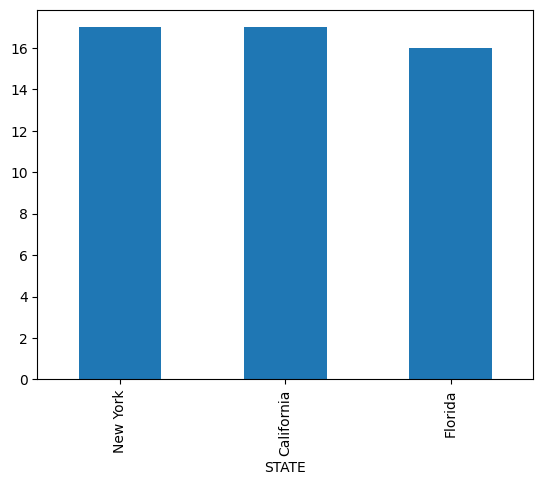

In [48]:
df['STATE'].value_counts().plot(kind='bar')

Seperate X and Y

In [49]:
X = df.drop(columns=['STATE'])
Y =df[['STATE']]

In [50]:
X.head()

,RND,ADMIN,MKT,PROFIT
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [51]:
Y.head()

,STATE
0,New York
1,California
2,Florida
3,New York
4,Florida


In [52]:
X.dtypes

RND       float64
ADMIN     float64
MKT       float64
PROFIT    float64
dtype: object

Preprocess the X values

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [54]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')



In [55]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,RND,ADMIN,MKT,PROFIT
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


Train and Test Split

In [56]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [57]:
xtrain.head()

,RND,ADMIN,MKT,PROFIT
46,-1.593413,-0.199322,0.711122,-1.566922
47,-1.622362,0.507722,-1.743127,-1.740627
15,0.897913,0.045868,0.419219,0.448720
9,1.091819,-0.456640,0.776107,0.946022
16,0.094441,0.009118,0.440446,0.375436


In [58]:
ytrain.head()

,STATE
46,Florida
47,California
15,New York
9,California
16,California


In [59]:
xtest.head()

,RND,ADMIN,MKT,PROFIT
13,0.402078,0.510179,0.343957,0.558750
39,-0.773820,-1.383122,-0.297583,-0.777094
30,-0.258074,-0.205629,-0.990357,-0.302625
45,-1.600350,0.101254,-1.727400,-1.180082
17,0.460720,0.855666,0.591017,0.334771


In [60]:
ytest.head()

,STATE
13,California
39,California
30,Florida
45,New York
17,New York


In [61]:
xtrain.shape

(33, 4)

In [62]:
xtest.shape

(17, 4)

Create a KNN Model

In [63]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=15)
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [64]:
model.score(xtrain, ytrain)

0.45454545454545453

In [65]:
model.score(xtest, ytest)

0.35294117647058826

Hyperparameter tuning with GridSearchCV

In [66]:
params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [67]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [68]:
gscv.best_params_

{'n_neighbors': 7}

In [69]:
gscv.best_score_

0.25492063492063494

In [70]:
best_knn = gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=7)

Evaluate the ModuleNotFoundError

In [71]:
best_knn.score(xtrain, ytrain)

0.48484848484848486

In [72]:
best_knn.score(xtest, ytest)

0.23529411764705882

predict results for train and test

In [73]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)


In [74]:
ypred_tr[0:5]

array(['Florida', 'California', 'California', 'California', 'Florida'],
      dtype=object)

In [75]:
ytrain.head()

,STATE
46,Florida
47,California
15,New York
9,California
16,California


In [76]:
ypred_ts[0:5]

array(['Florida', 'New York', 'New York', 'California', 'Florida'],
      dtype=object)

In [77]:
ytest.head()

,STATE
13,California
39,California
30,Florida
45,New York
17,New York


Create a confusion matrix

In [78]:
c = best_knn.classes_
c

array(['California', 'Florida', 'New York'], dtype=object)

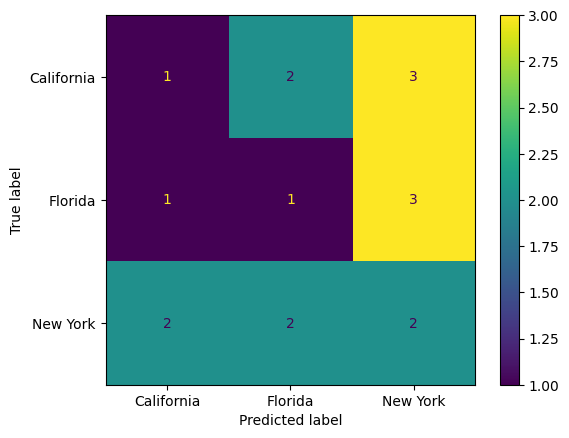

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

Check classification Report

In [80]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

  California       0.25      0.17      0.20         6
     Florida       0.20      0.20      0.20         5
    New York       0.25      0.33      0.29         6

    accuracy                           0.24        17
   macro avg       0.23      0.23      0.23        17
weighted avg       0.24      0.24      0.23        17



In [81]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


Apply pre.transform on xnew

In [83]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- petal_length
- petal_width
- sepal_length
- sepal_width
Feature names seen at fit time, yet now missing:
- ADMIN
- MKT
- PROFIT
- RND
